# Project: No Show Appointments

#### Author: [Gustavo Bertoli](https://github.com/gubertoli)
#### Dataset Source: https://www.kaggle.com/joniarroba/noshowappointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

                                            Udacity Data Analysis Nanodegree

<a id='intro'></a>
## Introduction

This report presents a dataset investigation. The dataset chosen for this task is the **No Show Appointment** dataset released on 2016 through the Kaggle platform by the user [@JoniHoppen](https://www.kaggle.com/joniarroba).

The main reason to work with this dataset is that it uses data from my home country (Brazil), so besides the practive of technical side (Python, Pandas, Numpy, ...), I envision to improve my analysis with my knowledge about the country.

> This dataset's publisher rises the question **Why do 30% of patients miss their scheduled appointments?**
> Also, more questions to be investigate through this report are:
> - What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
> - Being a Bolsa Família recipient correlates to the no-show event ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# magic command to enable plot to be shown on the Jupyter Notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('noshowappointments.csv', header=0)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# to verify number of lines (examples), attributes (columns) and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Columns Description

- PatientId (float) - The unique identification of a pacient
- AppointmentID (int) - The unique identification of a specific appointment
- Gender (str) - Male or Female
- ScheduledDay (str) - The day that the appointment was scheduled
- AppointmentDay (str) - The day of the appointment
- Age (int) - The age of patient
- Neighbourhood (str) - The neighbourhood of the local where the appointment will occur (hospital unit)
- Scholarship (int) - If the patient is a recipient of _Bolsa Familia_ (1=True, 0=False)
- Hipertension (int) - If the patient has hipertension (1=True, 0=False)
- Diabetes (int) - If the patient has diabetes (1=True, 0=False)
- Alcoholism (int) - If the patient has alcoholism issues (1=True, 0=False)
- Handcap (int) - The number of desabilites a person has _(For example, if the person is blind and can't walk the total is 2)_
- SMS_received (int) - How many SMS sent
- No-show (str) - If there was an no-show (No / Yes)

### Checking duplicated examples and missing values 

In [4]:
duplicated = df.duplicated().sum()             # checking if there are duplicated examples (lines)
missing_values = df.isnull().any(axis=1).sum() # checking if there are lines with null attributes

print("There are {} duplicated lines and {} lines with missing values".format(duplicated, missing_values)) 

There are 0 duplicated lines and 0 lines with missing values


### Understanding the values for each column

<a id='numeric_desc'></a>
#### Numeric Values

In [5]:
# despite the fact that is possible to use describe(include='all'), it is not useful
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,39217.84,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5030230.00,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.709000e+01,2.311000e+01,-1.00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,1.000000e-01,3.000000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,2.000000e-01,4.000000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.000000e-02,2.600000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.000000e-02,1.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.000000e-02,1.600000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.200000e-01,4.700000e-01,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


#### String Values

In [6]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [7]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [8]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

### Data Cleaning

From data science perpective, attributes with low variance or that are qualitative attributes do not provide useful information for the learning task. Due to that, it was decided to drop columns related with ID, which are **PatientID** and **AppointmentID** 

In [9]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

From the dataset information is possible to confirm that **ScheduledDay** and **AppointmentDay** are of **string** type, but to support the native use of Pandas methods, it is required to fix the datatype to **datetime**

In [10]:
# confirming ScheduledDay and AppointmentDay datatype

print("ScheduledDay datatype: {} \nAppointmentDay datatype: {}".format(type(df.ScheduledDay.values[0]), type(df.AppointmentDay.values[0])))

ScheduledDay datatype: <class 'str'> 
AppointmentDay datatype: <class 'str'>


In [11]:
# fixing columns data type (from str to datetime)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# confirming ScheduledDay and AppointmentDay datatype
print("ScheduledDay datatype: {} \nAppointmentDay datatype: {}".format(type(df.ScheduledDay.values[0]), type(df.AppointmentDay.values[0])))

ScheduledDay datatype: <class 'numpy.datetime64'> 
AppointmentDay datatype: <class 'numpy.datetime64'>


It is expected that the **ScheduledDay** are after the **AppointmentDay**, so, you schedule prior to the appointment. So, to comply with this rationale, this verification is done below and those examples that do not comply with this heuristic are removed from the dataset.

In [12]:
# Examples that do not comply with the heuristic (Schedule prior to the Appointment)
df.query('ScheduledDay.dt.date > AppointmentDay')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [13]:
# Keep the examples that comply with the rule
df = df.query('ScheduledDay.dt.date <= AppointmentDay')
df.shape

(110522, 12)

It was evidenced on [Dataset Description](#numeric_desc) that there are patient with Age minus 1, once this is not a correct value, a filter is to keep those with age greater or equal than 0

In [14]:
df = df.query('Age >= 0')

> To be restricted on this dataset only, the column **Neighbourhood** are being dropped also. But this column can be used to derive more information, such as, the localization of the hospital if far or close to downtown, bus stations, pacient house, among others information.

In [15]:
df.drop(['Neighbourhood'], axis=1, inplace=True)

Finally, after the removal of qualitative columns (identifications and neighbourhood), it is expected more duplicated columns, let's check that...

In [16]:
duplicated = df.duplicated().sum()             # checking if there are duplicated examples (lines)
missing_values = df.isnull().any(axis=1).sum() # checking if there are lines with null attributes

print("There are {} duplicated lines and {} lines with missing values".format(duplicated, missing_values)) 

There are 722 duplicated lines and 0 lines with missing values


In [17]:
# removing those duplicated lines

df.drop_duplicates(inplace=True)

duplicated = df.duplicated().sum()             # checking if there are duplicated examples (lines)
missing_values = df.isnull().any(axis=1).sum() # checking if there are lines with null attributes

print("There are {} duplicated lines and {} lines with missing values".format(duplicated, missing_values)) 

There are 0 duplicated lines and 0 lines with missing values


In [18]:
# The cleaned dataset (rows, columns)

df.shape

(109799, 11)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

First of all, let's check the total of No-show events on this dataset. This information is provided by the column **No-show** with _Yes_ representing a No-show event and _No_ representing an Appointment attended.

In [19]:
no_show = df['No-show'].value_counts()
no_show

No     87753
Yes    22046
Name: No-show, dtype: int64

In [20]:
num_examples = df.shape[0]
no_show_percentage = (no_show/num_examples)*100
no_show_no = no_show_percentage.round(2)[0]
no_show_yes = no_show_percentage.round(2)[1]

print("In the dataset (n={}) there are {} ({}%) examples of no-show events and {} ({}%) examples of appointment accomplished".format(num_examples, no_show[1], no_show_yes, no_show[0], no_show_no))

In the dataset (n=109799) there are 22046 (20.08%) examples of no-show events and 87753 (79.92%) examples of appointment accomplished


Creating a new columns called **num_days** that represents the number of days from the schedule to the appointment

In [21]:
df.insert(loc=3, column="num_days", value=(df.AppointmentDay.dt.date - df.ScheduledDay.dt.date).astype('int64'))
df.head()

,Gender,ScheduledDay,AppointmentDay,num_days,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,62,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,8,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,56,0,1,1,0,0,0,No


Another derived feature from **ScheduledDay** is the weekday (the day of the week with Monday=0, Sunday=6), so let's create this new column because it is more informative.

In [22]:
df.insert(loc=4, column="weekday", value=(df.ScheduledDay.dt.dayofweek).astype('int64'))
df.head()

,Gender,ScheduledDay,AppointmentDay,num_days,weekday,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,4,62,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,4,56,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,4,62,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,4,8,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,4,56,0,1,1,0,0,0,No


Also, let's perform a column change from string to int
- No-show: from No/Yes to 0/1
- Gender: from M/F to 0/1

In [23]:
df['No-show'] = df['No-show'].map(dict(Yes=1, No=0))
df['Gender'] = df['Gender'].map(dict(F=1, M=0))
df.head()

,Gender,ScheduledDay,AppointmentDay,num_days,weekday,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,1,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,4,62,0,1,0,0,0,0,0
1,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,4,56,0,0,0,0,0,0,0
2,1,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,4,62,0,0,0,0,0,0,0
3,1,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,4,8,0,0,0,0,0,0,0
4,1,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,4,56,0,1,1,0,0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109799 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          109799 non-null  int64              
 1   ScheduledDay    109799 non-null  datetime64[ns, UTC]
 2   AppointmentDay  109799 non-null  datetime64[ns, UTC]
 3   num_days        109799 non-null  int64              
 4   weekday         109799 non-null  int64              
 5   Age             109799 non-null  int64              
 6   Scholarship     109799 non-null  int64              
 7   Hipertension    109799 non-null  int64              
 8   Diabetes        109799 non-null  int64              
 9   Alcoholism      109799 non-null  int64              
 10  Handcap         109799 non-null  int64              
 11  SMS_received    109799 non-null  int64              
 12  No-show         109799 non-null  int64              
dtypes: datetime64[

Also, let's work with just **num_days** and **weekday** instead of datetime columns (**ScheduledDay**, **AppointmentDay**), I am assuming that the those new columns are features that provide more information and is more interpretative than the schedule and appointment dates by itself 

In [25]:
df.drop(['AppointmentDay', 'ScheduledDay'], axis=1, inplace=True)
df.head()

,Gender,num_days,weekday,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,1,0,4,62,0,1,0,0,0,0,0
1,0,0,4,56,0,0,0,0,0,0,0
2,1,0,4,62,0,0,0,0,0,0,0
3,1,0,4,8,0,0,0,0,0,0,0
4,1,0,4,56,0,1,1,0,0,0,0


Let's get a grasp of the dataset from a histogram analysis:

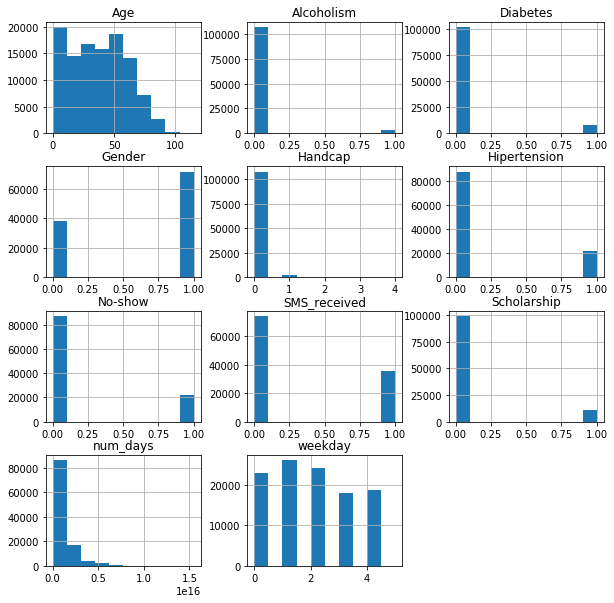

In [26]:
df.hist(figsize=(10,10));

- Age ranges from 0 to 100 year (with most of the case between 0 and 70) - _right skewed dataset_
- Majority of cases has no Alcoholism (Alcoholism = 0)
- Majority of cases has no Diabetes (Diabetes = 0)
- Majority of cases has no Handicap (Handicap = 0)
- Majority of cases has no Hipertension (Hipertension = 0), but there are more cases of hipertension then Handicap, Diabetes and Alcoholism
- Twice of the schedules are with Female
- Almost half of the schedules received SMS. The max number of SMS is 1
- The minority of schedules are _Bolsa Familia_ recipient
- Almost all schedules are within 0 or 1 day
- There are no weekends on the schedule (from 0 to 4 only) with most schedules on Monday, Tuesday and Wednesday (0, 1, 2)

To answer the **Research Question 1**, let's check the correlation of all columns against the classification column **No-show**

In [27]:
df.corr().style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

,Gender,num_days,weekday,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Gender,1.000,0.029,-0.005,0.106,0.114,0.056,0.033,-0.106,-0.023,0.046,0.005
num_days,0.029,1.000,0.014,0.034,-0.030,-0.018,-0.027,-0.039,-0.020,0.401,0.187
weekday,-0.005,0.014,1.000,0.012,-0.005,0.001,-0.000,0.007,0.001,0.080,0.005
Age,0.106,0.034,0.012,1.000,-0.093,0.504,0.292,0.096,0.078,0.012,-0.060
Scholarship,0.114,-0.030,-0.005,-0.093,1.000,-0.020,-0.025,0.034,-0.009,0.001,0.029
Hipertension,0.056,-0.018,0.001,0.504,-0.020,1.000,0.433,0.088,0.081,-0.007,-0.036
Diabetes,0.033,-0.027,-0.000,0.292,-0.025,0.433,1.000,0.019,0.058,-0.015,-0.014
Alcoholism,-0.106,-0.039,0.007,0.096,0.034,0.088,0.019,1.000,0.003,-0.026,-0.000
Handcap,-0.023,-0.020,0.001,0.078,-0.009,0.081,0.058,0.003,1.000,-0.024,-0.006
SMS_received,0.046,0.401,0.080,0.012,0.001,-0.007,-0.015,-0.026,-0.024,1.000,0.129


So, based on the correlation plot, the most correlated features (positive correlations) with the **No-show** event are:

- num_days (0.187)
- SMS_received (0.129)

The interpretation of these features allows the interpretation that how far an appointment from the schedule day, the more a no-show can occur, also an SMS sent to the pacient works against a no-show.

_Note: It is important to mention that those features are not strong correlated (near to 1) with the **No-show**, however, in comparison with the other columns, they are the most correlated ones. The negative correlations are neglatible._

####  Other correlations that can be evidenced:
- **Hipertension** and **Diabetes** are positive correlated with **Age**, 0.504 and 0.292 respectively, allowing to conclude that older people have these health problems
- The **num_days** are positive correlated with **SMS_received** (0.401), allowing to conclude that more days from appointment to schedule days uses a SMS

### Research Question 2 - Being a Bolsa Família recipient correlates to the no-show event ?

According to the dataset publisher the columns **Scholarship** represents if the pacient is a _Bolsa Familia_ recipient or not. With "1" representing "yes" and "0" represents "no"

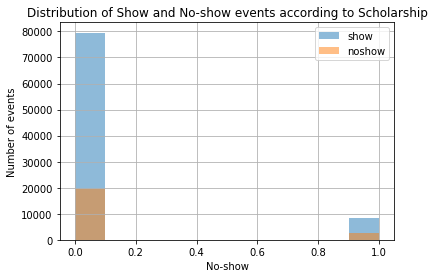

In [28]:
noshow = df['No-show'] == 1
yesshow = df['No-show'] == 0

df.Scholarship[yesshow].hist(alpha=0.5, label='show')
df.Scholarship[noshow].hist(alpha=0.5, label='noshow')

plt.title('Distribution of Show and No-show events according to Scholarship')
plt.xlabel('No-show')
plt.ylabel('Number of events')

plt.legend();

The correlation between **Scholarship** and **No-show** is **0.029** which can be interpreted as a low correlation between being a _Bolsa Familia_ recipient and No-showing to an appointment

Also this can be evidenced by Histogram between No-show events and Scholarship

<a id='conclusions'></a>
## Conclusions

- It can be concluded from the Data Analysis performed that the most correlated features with the **No-show** event are **num_days**, in other words, how many days from the appointment to the day of the scheduled event, greater interval correlates with greater no-show occurences.

- Also, it was evidenced that sending a SMS also correlates positively with a **No-show** event. A more critical thinking allows to understand that the SMS sending is due to the interval between the appointment and the scheduled day.

- Final conclusion is that: **The longer the time between an appointment and the medical consultation, the greater the correlation of occurrence of no-show**